<a href="https://colab.research.google.com/github/jayendra19/EDA_PROJECTS/blob/main/PLAY_SYORE_APP_REVIEW_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np

In [90]:
filepath="/content/drive/MyDrive/dataset/Play Store Data.csv"
df=pd.read_csv(filepath)

In [ ]:
filepath="/content/drive/MyDrive/dataset/User Reviews.csv"
dd=pd.read_csv(filepath)

In [ ]:
dd

In [8]:
df.shape

(10841, 13)

In [ ]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
540,"USA Singles Meet, Match and Date Free - Date",DATING,4.2,5084,9.6M,"100,000+",Free,0,Mature 17+,Dating,"August 3, 2018",1.55,4.1 and up
10409,studentsLife by FH Kärnten,FAMILY,4.4,108,Varies with device,"5,000+",Free,0,Everyone,Education,"March 30, 2018",4.0.1,4.4 and up
10290,FD VR - Virtual App Launcher,LIBRARIES_AND_DEMO,4.1,1463,7.4M,"100,000+",Free,0,Everyone,Libraries & Demo,"November 30, 2016",3.6.1,4.4 and up
5288,AK-47 Assult Rifle: Gun Shooting Simulator Game,GAME,NaN,1,5.8M,500+,Free,0,Everyone,Action,"May 17, 2018",2.0,4.0.3 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
10516,Fast Notes FJ,PRODUCTIVITY,4.2,12,2.2M,500+,Free,0,Everyone,Productivity,"August 12, 2014",8.0.0,2.2 and up
9077,junainfo.dy.fi,TRAVEL_AND_LOCAL,NaN,8,1.9M,100+,Free,0,Everyone,Travel & Local,"October 21, 2015",0.0.9,4.0 and up
6658,Free antivirus and VPN,TOOLS,4.3,27749,16M,"1,000,000+",Free,0,Everyone,Tools,"July 19, 2018",3.3.6,4.0.3 and up
10336,Santa Fe New Mexican e-Edition,NEWS_AND_MAGAZINES,4.1,25,17M,"1,000+",Free,0,Everyone,News & Magazines,"June 21, 2018",4.7.4.18.0621,4.1 and up
6417,BL 女性向け恋愛ゲーム◆ごくメン,FAMILY,4.2,1901,8.2M,"100,000+",Free,0,Mature 17+,Simulation,"July 7, 2016",1.3.0,2.3.3 and up


In [93]:
df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [40]:
#there are 483 duplicate records are there
df.duplicated().sum()

483

In [91]:
#droped the all the duplicates records
df=df.drop_duplicates()

In [ ]:
#columns_to_check = ['Type', 'Current Ver','Android Ver','Content Rating']# WE CAN USE THIS IF MULTIPLE COLUMN  HAVE LESS AMOUNT OF NULL VALUES WE CAN USE IT.
#df = df.dropna(subset=columns_to_check)

DEALING WITH MISSING VALUE


In [92]:
#finding null values
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [107]:
#IN THAT U CAN SEE THERE SOME VALUE WRITTEN VARIES WITH DEVICE WE REPLACE IT WITH NAN
(df['Size']=='Varies with device').sum()
#Replace 'varies with device' with NaN
df.replace('Varies with device', np.nan, inplace=True)

In [95]:
#finding null values
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver       1310
Android Ver       1224
dtype: int64

In [97]:
#percentage of missing value
missing_values = (((df.isnull().sum()).sum())/df.size)*100
missing_values

4.104593996465014

In [108]:
#filling the missing value
d=df['Rating'].mode()[0]
a=df['Type'].mode()[0]
b=df['Current Ver'].mode()[0]
c=df['Android Ver'].mode()[0]
l=df['Size'].mode()[0]

df['Rating']=df['Rating'].fillna(d)
df['Type']=df['Type'].fillna(a)
df['Current Ver']=df['Current Ver'].fillna(b)
df['Android Ver']=df['Android Ver'].fillna(c)
df['Size']=df['Size'].fillna(l)


In [109]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

FOUNDING OUTLIERS

In [78]:
#Founding the outliers
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [105]:
#droping the outliers
df.drop(10472,inplace=True)

In [100]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11M,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",1.0,4.1 and up


In [110]:
# Replace 'm' with * 1000000 and 'k' with * 1000
df['Size'] = df['Size'].str.replace('M', '*1000000').str.replace('k', '*1000')
df['Size'] = df['Size'].apply(lambda x: pd.eval(x) if pd.eval(x) == pd.eval(x) else None)#first we need to handle all the null value then do this otherwise
#"name 'nan' is not defined," is because the pd.eval() function is trying to evaluate an expression that includes 'nan', which is not defined as a variable.

In [111]:
#Cleaned Data set
#further performing feature engeenering
df['Current Ver']=df['Current Ver'].str.replace('Z','')
df['Current Ver']=df['Current Ver'].str.replace('Android','')
df['Installs']=df['Installs'].str.replace('+','')
df['Price']=df['Price'].str.replace('$','')

<ipython-input-111-0a7200a562e6>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace('+','')
<ipython-input-111-0a7200a562e6>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


In [115]:
#Doing feature engeenerring
df['Price']=df.loc[:,('Price')].astype('float64')
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')
df['Size']=pd.to_numeric(df['Size'],errors='coerce')
df['Installs'] = df['Installs'].str.replace(',', '').apply(pd.to_numeric)
df['Last Updated']=pd.to_datetime(df['Last Updated'])


In [151]:
#IM EXTRACTING YEAR MONTHS AAND DAY FROM DATE TIME COMPONENT U CAN DO THIS
df['year']=df['Last Updated'].dt.year
df['month']=df['Last Updated'].dt.month
df['day']=df['Last Updated'].dt.day

In [154]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7,25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7,6
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1,20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,1.0,4.1 and up,2015,1,19


In [155]:
ndf=df[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','year','month']]

In [158]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   year            10357 non-null  int64  
 10  month           10357 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 971.0+ KB


In [160]:
#going further in data preprocesing if u dont want u can skip it go for eda
pf=ndf

In [161]:
#SEPERATING NUMERICAL AND CATEHORICAL DATA
pf_cat=pf.select_dtypes(np.object)
pf_num=pf.select_dtypes(np.number)


<ipython-input-161-f8e6ac549325>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pf_cat=pf.select_dtypes(np.object)


In [162]:
pf_cat

,App,Category,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone
...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+


In [163]:
pf_num

,Rating,Reviews,Size,Installs,Price,year,month
0,4.1,159,19000000.0,10000,0.0,2018,1
1,3.9,967,14000000.0,500000,0.0,2018,1
2,4.7,87510,8700000.0,5000000,0.0,2018,8
3,4.5,215644,25000000.0,50000000,0.0,2018,6
4,4.3,967,2800000.0,100000,0.0,2018,6
...,...,...,...,...,...,...,...
10836,4.5,38,53000000.0,5000,0.0,2017,7
10837,5.0,4,3600000.0,100,0.0,2018,7
10838,4.4,3,9500000.0,1000,0.0,2017,1
10839,4.5,114,11000000.0,1000,0.0,2015,1


In [166]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
pf['Category']=l.fit_transform(pf_cat['Category'])
pf['Type']=l.fit_transform(pf_cat['Type'])
pf['Content Rating']=l.fit_transform(pf_cat['Content Rating'])

<ipython-input-166-81e6504b3eec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf['Category']=l.fit_transform(pf_cat['Category'])


In [173]:
pf=pf.drop('App',axis=1)

In [174]:
pf

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,year,month
0,0,4.1,159,19000000.0,10000,0,0.0,1,2018,1
1,0,3.9,967,14000000.0,500000,0,0.0,1,2018,1
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,2018,8
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,2018,6
4,0,4.3,967,2800000.0,100000,0,0.0,1,2018,6
...,...,...,...,...,...,...,...,...,...,...
10836,11,4.5,38,53000000.0,5000,0,0.0,1,2017,7
10837,11,5.0,4,3600000.0,100,0,0.0,1,2018,7
10838,20,4.4,3,9500000.0,1000,0,0.0,1,2017,1
10839,3,4.5,114,11000000.0,1000,0,0.0,3,2015,1


In [175]:
pf.describe()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,year,month
count,10357.000000,10357.000000,1.035700e+04,1.035700e+04,1.035700e+04,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000
mean,16.745776,4.217882,4.059046e+05,1.977199e+07,1.415776e+07,0.073863,1.030800,1.455151,2017.382929,6.397026
std,8.358896,0.489633,2.696778e+06,2.113044e+07,8.023955e+07,0.261561,16.278625,1.000599,1.112766,2.606359
min,0.000000,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,0.000000,0.000000,2010.000000,1.000000
25%,11.000000,4.100000,3.200000e+01,5.700000e+06,1.000000e+03,0.000000,0.000000,1.000000,2017.000000,5.000000
50%,14.000000,4.400000,1.680000e+03,1.100000e+07,1.000000e+05,0.000000,0.000000,1.000000,2018.000000,7.000000
75%,25.000000,4.500000,4.641600e+04,2.600000e+07,1.000000e+06,0.000000,0.000000,1.000000,2018.000000,8.000000
max,32.000000,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,1.000000,400.000000,5.000000,2018.000000,12.000000


In [176]:
pf.corr()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,year,month
Category,1.000000,-0.038075,0.008790,-0.122838,0.032112,0.016009,-0.013289,-0.092010,-0.011687,0.005688
Rating,-0.038075,1.000000,0.058593,0.041429,0.039363,0.041033,-0.018818,0.016636,0.119307,0.011272
Reviews,0.008790,0.058593,1.000000,0.102119,0.634997,-0.041262,-0.009417,0.070748,0.075744,0.044681
Size,-0.122838,0.041429,0.102119,1.000000,0.042232,-0.019157,-0.019710,0.158836,0.180455,0.025315
Installs,0.032112,0.039363,0.634997,0.042232,1.000000,-0.049513,-0.011147,0.055067,0.087380,0.053847
Type,0.016009,0.041033,-0.041262,-0.019157,-0.049513,1.000000,0.224234,-0.045083,-0.177143,-0.005627
Price,-0.013289,-0.018818,-0.009417,-0.019710,-0.011147,0.224234,1.000000,-0.015007,-0.005627,0.006490
Content Rating,-0.092010,0.016636,0.070748,0.158836,0.055067,-0.045083,-0.015007,1.000000,0.048815,0.042670
year,-0.011687,0.119307,0.075744,0.180455,0.087380,-0.177143,-0.005627,0.048815,1.000000,-0.190497
month,0.005688,0.011272,0.044681,0.025315,0.053847,-0.005627,0.006490,0.042670,-0.190497,1.000000


In [177]:
pf_corr=pf.corr()
print(pf_corr['Rating'].sort_values(ascending=False))#there are strong correlation between rating and year cuz it tell u when u give ur rating

Rating            1.000000
year              0.119307
Reviews           0.058593
Size              0.041429
Type              0.041033
Installs          0.039363
Content Rating    0.016636
month             0.011272
Price            -0.018818
Category         -0.038075
Name: Rating, dtype: float64


In [178]:
pf_corr=pf.corr()
print(pf_corr['Reviews'].sort_values(ascending=False))

Reviews           1.000000
Installs          0.634997
Size              0.102119
year              0.075744
Content Rating    0.070748
Rating            0.058593
month             0.044681
Category          0.008790
Price            -0.009417
Type             -0.041262
Name: Reviews, dtype: float64


In [179]:
pf_corr=pf.corr()
print(pf_corr['Size'].sort_values(ascending=False))

Size              1.000000
year              0.180455
Content Rating    0.158836
Reviews           0.102119
Installs          0.042232
Rating            0.041429
month             0.025315
Type             -0.019157
Price            -0.019710
Category         -0.122838
Name: Size, dtype: float64


In [180]:
pf_corr=pf.corr()
print(pf_corr['Installs'].sort_values(ascending=False))

Installs          1.000000
Reviews           0.634997
year              0.087380
Content Rating    0.055067
month             0.053847
Size              0.042232
Rating            0.039363
Category          0.032112
Price            -0.011147
Type             -0.049513
Name: Installs, dtype: float64


In [181]:
pf_corr=pf.corr()
print(pf_corr['Type'].sort_values(ascending=False))

Type              1.000000
Price             0.224234
Rating            0.041033
Category          0.016009
month            -0.005627
Size             -0.019157
Reviews          -0.041262
Content Rating   -0.045083
Installs         -0.049513
year             -0.177143
Name: Type, dtype: float64


In [182]:
pf_corr=pf.corr()
print(pf_corr['Price'].sort_values(ascending=False))

Price             1.000000
Type              0.224234
month             0.006490
year             -0.005627
Reviews          -0.009417
Installs         -0.011147
Category         -0.013289
Content Rating   -0.015007
Rating           -0.018818
Size             -0.019710
Name: Price, dtype: float64


                                                           STARTS EDA FROM HERE


In [118]:
#DOING SOME BIVARIAENT ANALYSIS
ndf['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [142]:
#doing some univarient analysis on content rating
ndf['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [133]:
ndf.groupby('Category')['Rating'].mean().sort_values(ascending=True).head(10)#AVERAGE RATING OF TOP 10 CATEGORY

Category
DATING                 4.052551
MAPS_AND_NAVIGATION    4.084672
VIDEO_PLAYERS          4.092571
TOOLS                  4.093001
TRAVEL_AND_LOCAL       4.135443
ENTERTAINMENT          4.136036
LIFESTYLE              4.151475
FINANCE                4.160000
COMICS                 4.163333
NEWS_AND_MAGAZINES     4.179924
Name: Rating, dtype: float64

In [135]:
#THERE ARE ONLY 765 APPS THAT ARE PAID IN THIS DATA FRAME
pdf=df[df['Type']=='Paid']
pdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,11000000.0,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,11000000.0,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.4,17,157000.0,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9500000.0,10000,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [136]:
#THERE ARE ONLY 765 APPS THAT ARE PAID IN THIS DATA FRAME
fdf=df[df['Type']=='Free']
fdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",1.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",1.0,4.1 and up


In [128]:
#TOP 10 POPULAR APPS
'''We first group the data by the "App" column and calculate the mean rating for each app using df.groupby("App")["Rating"].mean().reset_index().
Then, we sort the grouped data by the mean rating in descending order.'''
g=ndf.groupby(['App','Category'])['Rating'].mean().reset_index()
top_10=g.sort_values(by='Rating',ascending=False).head(20)
top_10

,App,Category,Rating
1948,CD CHOICE TUBE,FAMILY,5.0
7360,RETRO Shocked DW-6000,PERSONALIZATION,5.0
3143,DW Security,BUSINESS,5.0
2099,CL REPL,TOOLS,5.0
3148,DW Timer,TOOLS,5.0
1580,Bh Public School,FAMILY,5.0
2101,CL Strength,HEALTH_AND_FITNESS,5.0
7334,R Programing Offline Tutorial,BOOKS_AND_REFERENCE,5.0
3169,DYPSOET,FAMILY,5.0
710,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0


In [130]:
#TOP 10 CATEGORY
e=ndf.groupby('Category')['Rating'].mean().reset_index()
top_10_category=e.sort_values(by='Rating',ascending=False).head(10)
top_10_category

,Category,Rating
10,EVENTS,4.425000
8,EDUCATION,4.376154
0,ART_AND_DESIGN,4.360000
3,BOOKS_AND_REFERENCE,4.359565
23,PERSONALIZATION,4.347165
22,PARENTING,4.316667
2,BEAUTY,4.303774
14,GAME,4.286262
15,HEALTH_AND_FITNESS,4.281373
27,SOCIAL,4.273571


In [ ]:
#Total Number of App Titles Contain Astrology using contains it wil perform case sensitive search
ndf[ndf['App'].str.contains('Astrology',case=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1570,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143,11.0,"10,000,000",Free,0.0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
1592,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15.0,"100,000",Free,0.0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000",Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#. Find Average App Rating
ndf['Rating'].mean()

4.217881625953462

In [ ]:
#Find Total Number of Unique Category
ndf['Category'].nunique()#there are 33 value

33

In [ ]:
#Which Category Getting The Highest Average Rating?
ndf.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.425000
EDUCATION              4.376154
ART_AND_DESIGN         4.360000
BOOKS_AND_REFERENCE    4.359565
PERSONALIZATION        4.347165
PARENTING              4.316667
BEAUTY                 4.303774
GAME                   4.286262
HEALTH_AND_FITNESS     4.281373
SOCIAL                 4.273571
SHOPPING               4.266071
SPORTS                 4.257550
WEATHER                4.257317
MEDICAL                4.238971
PRODUCTIVITY           4.237346
LIBRARIES_AND_DEMO     4.230588
AUTO_AND_VEHICLES      4.220000
FAMILY                 4.215337
BUSINESS               4.211944
HOUSE_AND_HOME         4.200000
FOOD_AND_DRINK         4.198387
PHOTOGRAPHY            4.195031
COMMUNICATION          4.191530
NEWS_AND_MAGAZINES     4.179924
COMICS                 4.163333
FINANCE                4.160000
LIFESTYLE              4.151475
ENTERTAINMENT          4.136036
TRAVEL_AND_LOCAL       4.135443
TOOLS                  4.093001
VIDEO_PLAYERS          4.092571

In [ ]:
#Find Total Number of App having 5 Star Rating
len(ndf[ndf['Rating']==5.0])

271

In [ ]:
#Find Average Value of Reviews
ndf['Reviews'].mean()

405904.6106015255

In [ ]:
#Find Total Number of Free and Paid Apps
ndf['Type'].value_counts()


Free    9592
Paid     765
Name: Type, dtype: int64

In [ ]:
# Which App Has Maximum Reviews?
ndf[ndf['Reviews'].max()==ndf['Reviews']]['App']#we can get those value with this always remember
''' == ndf['Reviews'] creates a Boolean Series of the same length as the DataFrame, where each element is True if the number of reviews in that row is equal to the maximum
number of reviews (ndf['Reviews'].max()). This effectively marks the row(s) that have the maximum number of reviews with True and all other rows with False.'''

2544    Facebook
Name: App, dtype: object

In [ ]:
#Display Top 5 Apps Having Highest Reviews
h=ndf.sort_values(by='Reviews',ascending=False)

h['App'].head(5)

2544              Facebook
3943              Facebook
336     WhatsApp Messenger
3904    WhatsApp Messenger
2604             Instagram
Name: App, dtype: object

In [ ]:
#Find Average Rating of Free and Paid Apps
ndf.groupby('Type')['Rating'].mean()#dont forget ur basics dude

Type
Free    4.212208
Paid    4.289020
Name: Rating, dtype: float64

In [141]:
#Display Top  5 Apps Having Maximum Installs
ndf[ndf['Installs'].max()==ndf['Installs']][['App','Installs']]#best technique ndf['Installs'] creates a Boolean mask that checks for each row if the "Installs" value is equal to the maximum value

,App,Installs
605,Cardi B Live Stream Video Chat - Prank,500.0
616,Live Chat - Free Video Chat Rooms,500.0
617,Meet With Strangers: Video Chat & Dating,500.0
624,Live chat - free video chat,500.0
626,Fishing Brain & Boating Maps Marine,500.0
...,...,...
10743,FP BW LCD View,500.0
10767,NFP 2018,500.0
10788,Fountain Live Wallpaper HD – Dubai Wallpaper 3D,500.0
10806,SnakeBite911 FR,500.0


In [ ]:
ndf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,NaN,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,NaN,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,NaN,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,NaN,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,NaN,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,NaN,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5,NaN,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,NaN,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#ANALYSIS ON PAID APPS
pdf.groupby()

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

def chart(data,chart_type, x_col=None, y_col=None,g_cl=None,p_cl=None,colormap=None,bins_col=None, hue_col=None,palette_col=None,cl=None,gl=None,title=None,xlabel=None,ylabel=None,value_counts=False,group_by=False):
    # Set the Seaborn style (optional)
    sns.set(style="whitegrid")
    plt.figure(figsize=(16,5))


    if value_counts=='group_by':
        # Perform a groupby operation and calculate value counts
        g = data.groupby(g_cl)[p_cl].mean().reset_index()
        g.plot(kind='bar')

    # Create the specified chart
    elif chart_type == 'scatterplot':
        sns.scatterplot(data=data, x=x_col,y=y_col, hue=hue_col,palette=palette_col)
    elif chart_type == 'barplot':
        sns.barplot(data=data, x=x_col, y=y_col, hue=hue_col,palette=palette_col)
    elif chart_type == 'lineplot':
        sns.lineplot(data=data, x=x_col, y=y_col, hue=hue_col,palette=palette_col)
    elif chart_type == 'histplot':
        sns.histplot(data=data, x=x_col,bins=bins_col,palette=palette_col)
    elif chart_type == 'value_counts_bar':
        if value_counts:
            v = data[x_col].value_counts().nlargest(10)
            v.plot(kind='bar', colormap='summer')



    # Add more chart types and customization as needed
    # Show the chart
    plt.title(title,fontsize=25)
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
    plt.xticks(rotation=90)
    plt.show()

# Example usage:
# create_seaborn_chart(df, 'scatter', 'Age', 'Salary', hue_col='Gender')
# create_seaborn_chart(df, 'bar', 'Category', 'Sales', hue_col='Region')


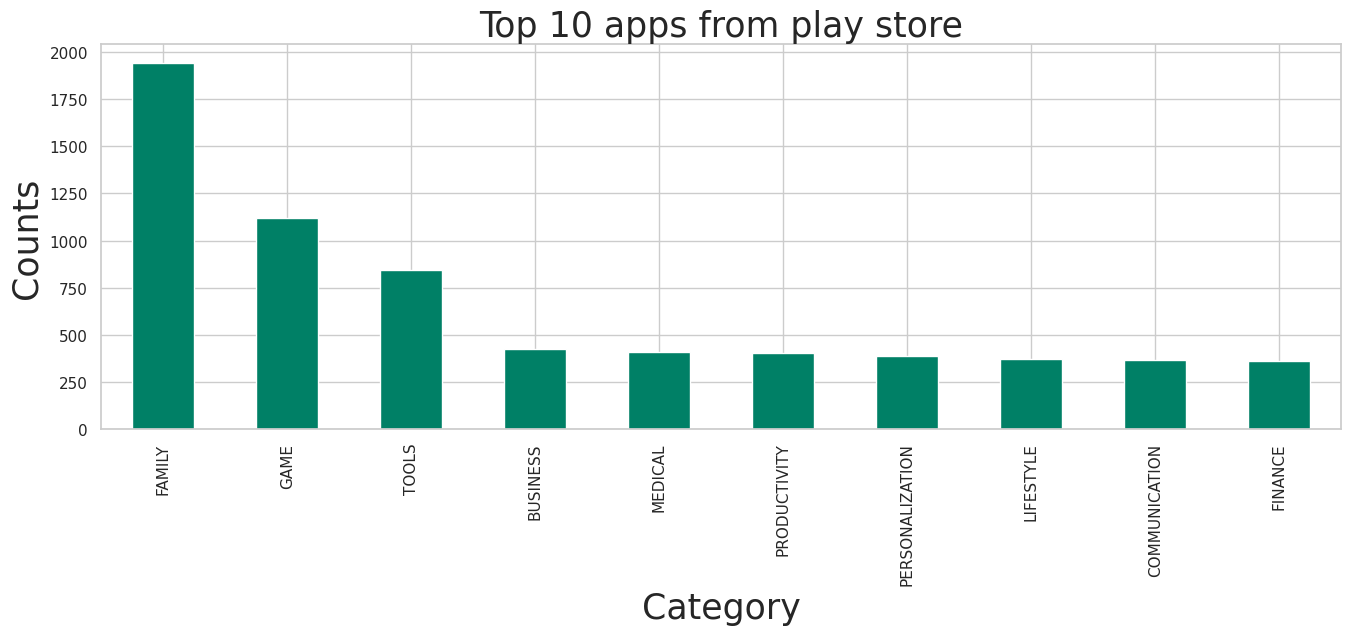

In [ ]:
chart(df,'value_counts_bar','Category','Count',value_counts=True,colormap='summer',title='Top 10 apps from play store',xlabel='Category',ylabel='Counts')

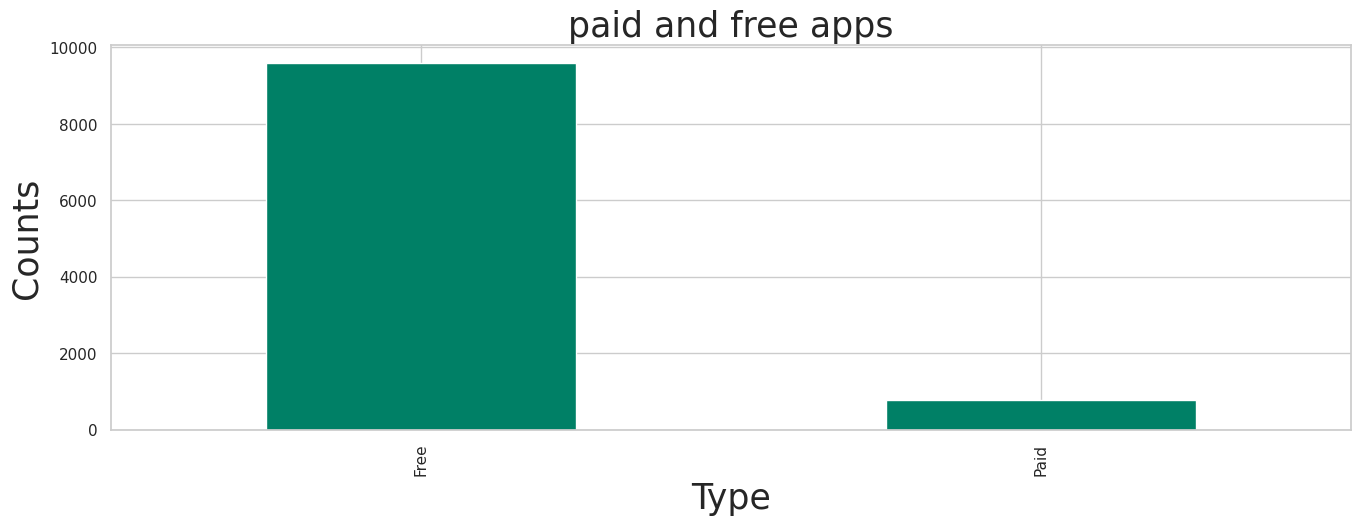

In [ ]:
chart(df,'value_counts_bar','Type','Count',value_counts=True,colormap='summer',title='paid and free apps',xlabel='Type',ylabel='Counts')

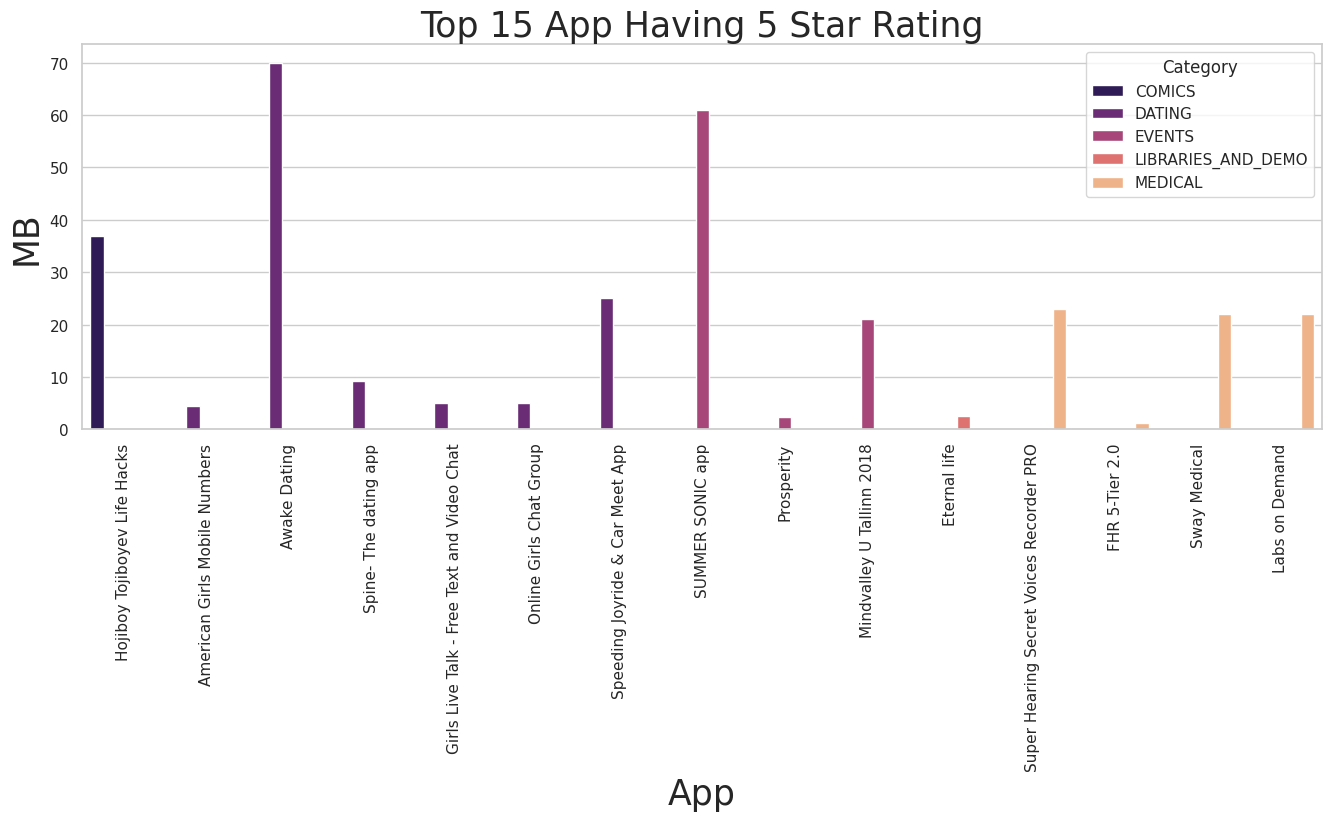

In [ ]:
#Total Number of App having 10 Star Rating
a=ndf[ndf['Rating']==5.0][['App','Category','Size']].head(15)
chart(a,'barplot','App','Size',hue_col='Category',palette_col='magma',title='Top 15 App Having 5 Star Rating',xlabel='App',ylabel='MB')

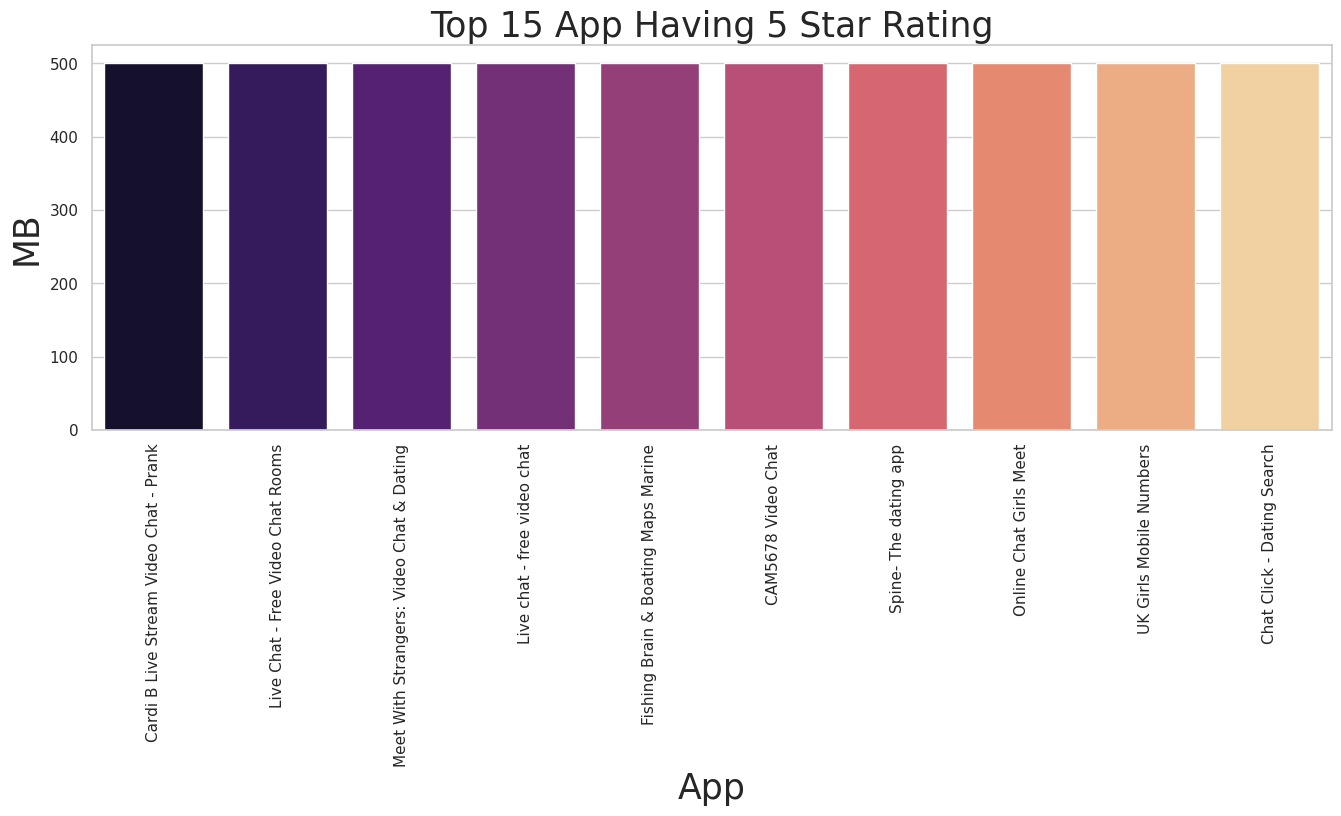

In [ ]:
##Display Top  5 Apps Having Maximum Installs
n=ndf[ndf['Installs'].max()==ndf['Installs']][['App','Installs']].head(50)
chart(n,'barplot',x_col='App',y_col='Installs',palette_col='magma',title='Top 15 App Having 5 Star Rating',xlabel='App',ylabel='MB')